In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math
import seaborn as sns

In [4]:
files=["sup_2_5_1.csv","unsup_2_5_1.csv"]
files=["sup_5_1.csv"]
dfs=[]
for f in files:
    dfs.append(pd.read_csv(f"study_results/{f}"))
df = pd.concat(dfs,sort=False)
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df["abs_freq_error_std"]=df["abs_freq_error"]
df["abs_phase_error_std"]=df["abs_phase_error"]
df.groupby(["model"]).agg({"abs_freq_error":"mean","abs_phase_error":"mean"}).sort_values("abs_phase_error")

,abs_freq_error,abs_phase_error
model,,
our_simp_comp,0.134120,0.961705
complex_wide,0.138463,0.979558
complex,0.137914,0.989780
our_simp,0.181779,1.363292
control_ma,0.221036,1.636428
control_tapper,0.232945,1.652289


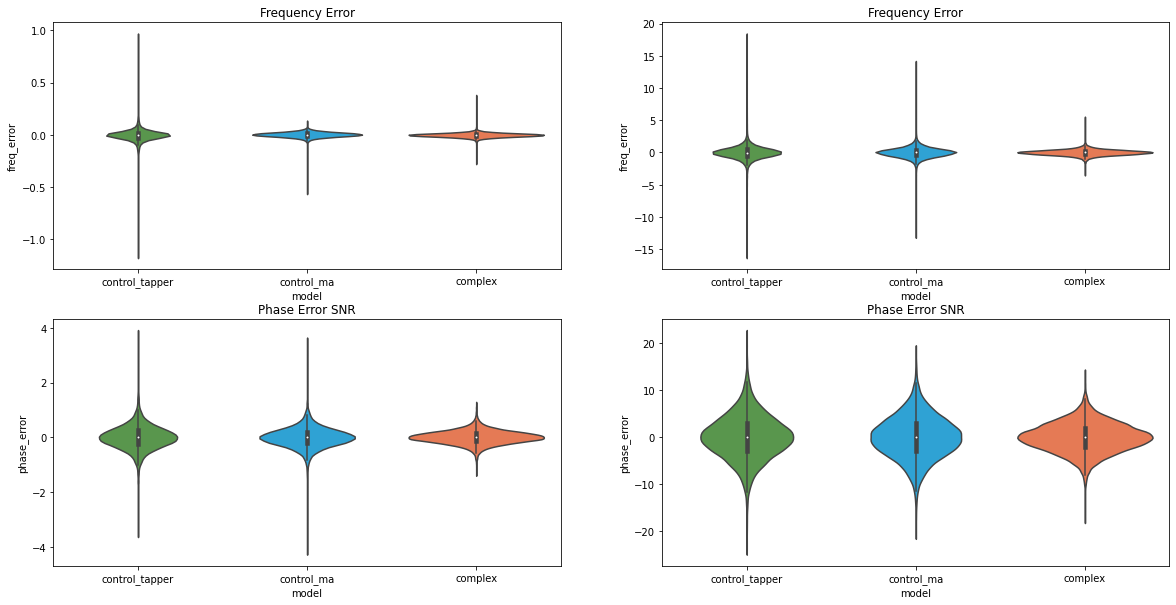

In [5]:
fig,ax = plt.subplots(2,2,figsize=(20,10))
#fig.tight_layout()

snrs = [10,5,2.5]
water_supression=True
y_freq_lim = 2
y_phase_lim = 4

wsups = [False,True]
models = ["control_tapper","control_ma","complex"]
model_labels = ["MLP","CNN","C_CNN"]
colors = ['seagreen','dodgerblue','coral']
markers = ['o','^','s']
title_texts=[""]
colour_palette = {"control_tapper": "#51A241", "control_ma": "#13ADF0", "complex": "#FD6E3D"}

order_dict={"control_tapper":1,"control_ma":2,"complex":3}

df = df[df["model"].isin(order_dict.keys())]

for i in range(0,2):
    water_supression = wsups[i]
    i_df = df[(df["water_suppression"]==water_supression)].copy()
    i_df['order']=i_df.apply(lambda x: order_dict[x['model']],axis=1)
    i_df = i_df.sort_values("order")
    sns.violinplot(data=i_df, x='model', y='freq_error', palette=colour_palette, ax=ax[0, i]).set(title=f'Frequency Error')
    sns.violinplot(data=i_df, x='model', y='phase_error', palette=colour_palette, ax=ax[1, i]).set(title=f'Phase Error SNR')

plt.show()

In [2]:
files=["sup_2_5_1.csv","sup_5_1.csv","sup_10_1.csv","unsup_2_5_1.csv","unsup_5_1.csv","unsup_10_1.csv"]
dfs=[]
for f in files:
    dfs.append(pd.read_csv(f"study_results/{f}"))
df = pd.concat(dfs,sort=False)
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df["abs_freq_error_std"]=df["abs_freq_error"]
df["abs_phase_error_std"]=df["abs_phase_error"]

FileNotFoundError: [Errno 2] No such file or directory: 'study_results/sup_5_1.csv'

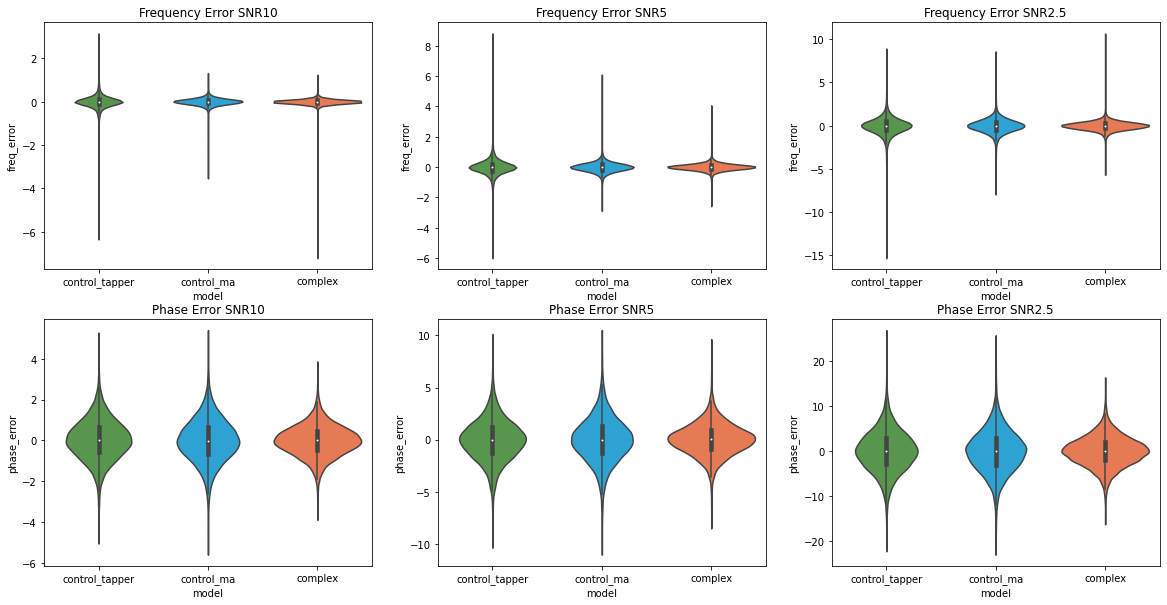

In [8]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
#fig.tight_layout()

snrs = [10,5,2.5]
water_supression=True
y_freq_lim = 2
y_phase_lim = 4

models = ["control_tapper","control_ma","complex"]
model_labels = ["MLP","CNN","C_CNN"]
colors = ['seagreen','dodgerblue','coral']
markers = ['o','^','s']
title_texts=[""]
colour_palette = {"control_tapper": "#51A241", "control_ma": "#13ADF0", "complex": "#FD6E3D"}

order_dict={"control_tapper":1,"control_ma":2,"complex":3}

df = df[df["model"].isin(order_dict.keys())]

for i in range(0,3):
    snr = snrs[i]
    i_df = df[(df["snr"]==snr)&(df["water_suppression"]==water_supression)].copy()
    i_df['order']=i_df.apply(lambda x: order_dict[x['model']],axis=1)
    i_df = i_df.sort_values("order")
    sns.violinplot(data=i_df, x='model', y='freq_error', palette=colour_palette, ax=ax[0, i]).set(title=f'Frequency Error SNR{snr}')
    sns.violinplot(data=i_df, x='model', y='phase_error', palette=colour_palette, ax=ax[1, i]).set(title=f'Phase Error SNR{snr}')

plt.show()

In [4]:
df = pd.read_csv("study_results/unsup_5_1.csv")
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df.groupby(["model"]).agg({"abs_freq_error":"mean","abs_phase_error":"mean"})

,abs_freq_error,abs_phase_error
model,,
complex,0.008316,0.088660
control_ma,0.010176,0.122285
control_tapper,0.022767,0.157573


In [12]:
df = pd.read_csv("study_results/sup_x_1_norm.csv")
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df.groupby(["model"]).agg({"abs_freq_error":"mean","abs_phase_error":"mean"})

,abs_freq_error,abs_phase_error
model,,
complex_long_norm,0.160482,1.235308
complex_norm,0.186459,1.302107
control_ma_norm,0.278961,1.925243
control_tapper_norm,0.378187,1.831364


In [5]:
df = pd.read_csv("study_results/sup_10_2.csv")
df["abs_freq_error"]=abs(df["freq_error"])
df["abs_phase_error"]=abs(df["phase_error"])
df.groupby(["model"]).agg({"abs_freq_error":"mean","abs_phase_error":"mean"})

,abs_freq_error,abs_phase_error
model,,
complex,0.084409,0.572081
complex_long,0.069624,0.541515
control_ma,0.112563,0.821188
control_tapper,0.210672,0.763684


In [23]:
wsups = [False,True]
for wsup in wsups:
    for col in ["abs_freq_error","abs_phase_error"]:
        i_df = df[df["water_suppression"]==wsup]
        test = i_df[i_df["model"]=="complex"][col].values
        control = i_df[i_df["model"]=="control_ma"][col].values

        print(f"--------- WATER SUPPRESSION: {wsup}  -- {col.split('_')[1]}  -------------------------")
        print(st.wilcoxon(test,control))
        print(f"cohen d :{(control.mean()-test.mean())/(math.sqrt((control.std()**2+test.std()**2)/2))}")
        print("--------------------------------------------------------------------------------------")


--------- WATER SUPPRESSION: False  -- freq  -------------------------
WilcoxonResult(statistic=47809164.5, pvalue=4.200454780828554e-169)
cohen d :0.21667444241479758
--------------------------------------------------------------------------------------
--------- WATER SUPPRESSION: False  -- phase  -------------------------
WilcoxonResult(statistic=40759597.5, pvalue=0.0)
cohen d :0.41623375304328214
--------------------------------------------------------------------------------------
--------- WATER SUPPRESSION: True  -- freq  -------------------------
WilcoxonResult(statistic=31034585.0, pvalue=0.0)
cohen d :0.5338278758596069
--------------------------------------------------------------------------------------
--------- WATER SUPPRESSION: True  -- phase  -------------------------
WilcoxonResult(statistic=38861382.5, pvalue=0.0)
cohen d :0.45590535247225905
--------------------------------------------------------------------------------------


In [6]:
##comparison with control_ma - Freq
test = df[df["model"]=="complex_long"]["abs_freq_error"].values
control = df[df["model"]=="control_ma"]["abs_freq_error"].values
print(st.wilcoxon(test,control))

#cohen d
print(f"cohen d :{(control.mean()-test.mean())/(math.sqrt((control.std()**2+test.std()**2)/2))}")

WilcoxonResult(statistic=35060971.0, pvalue=0.0)
cohen d :0.4685034194704512


In [7]:
##comparison with control_ma - Phase
test = df[df["model"]=="complex_long"]["abs_phase_error"].values
control = df[df["model"]=="control_ma"]["abs_phase_error"].values
print(st.wilcoxon(test,control))

#cohen d
print(f"cohen d :{(control.mean()-test.mean())/(math.sqrt((control.std()**2+test.std()**2)/2))}")

WilcoxonResult(statistic=36085435.5, pvalue=0.0)
cohen d :0.5036233389461274


In [65]:
##comparison with control_ma - Freq
size=10000
test = np.random.normal(10,10,size=size)
control = np.random.normal(9,10, size=size)
print(st.wilcoxon(test,control))

#cohen d
print(f"cohen d :{(control.mean()-test.mean())/(math.sqrt((control.std()**2+test.std()**2)/2))}")

WilcoxonResult(statistic=23500485.0, pvalue=1.963689934553389e-07)
cohen d :-0.07751042304688076


In [18]:
i_df = df[df["water_suppression"]==False]
test = i_df[i_df["model"]=="complex"]["abs_freq_error"].values[:100]
control = i_df[i_df["model"]=="control_ma"]["abs_freq_error"].values[:100]

In [21]:
str_list = [float(f"{i:.4f}") for i in list(test)]
for i in str_list:
    print(i)

0.0398
0.0243
0.0001
0.0141
0.0344
0.0236
0.0176
0.0377
0.0126
0.019
0.0343
0.0027
0.0276
0.011
0.0276
0.0364
0.0422
0.0515
0.0466
0.0106
0.0039
0.0271
0.0044
0.0211
0.053
0.0268
0.008
0.0108
0.012
0.0148
0.0072
0.0122
0.0141
0.0116
0.0074
0.0043
0.0551
0.0116
0.0057
0.0249
0.005
0.0409
0.0107
0.0233
0.0299
0.0188
0.0324
0.01
0.0265
0.0257
0.0249
0.0082
0.0112
0.0073
0.0066
0.0327
0.0028
0.025
0.048
0.0006
0.0033
0.0298
0.0216
0.0067
0.032
0.024
0.0031
0.0006
0.0586
0.0348
0.0021
0.0195
0.0034
0.0133
0.0163
0.0055
0.0018
0.0269
0.0224
0.0001
0.0122
0.0171
0.0034
0.0137
0.0136
0.0371
0.0088
0.0332
0.0352
0.012
0.0162
0.014
0.0242
0.0363
0.0195
0.0014
0.0191
0.037
0.003
0.045
